# Exploratory Data Analysis of Brazillian Medical Appointment No-Shows and Possible Related Characteristics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the 'No-show appointments' dataset for which to do exploratory data analysis. The base data was a modified version obtained from [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) and originally provided by [kaggle](https://www.kaggle.com/joniarroba/noshowappointments). 

This dataset contains information about specific medical appointments made in the city of Vitória, Brazil. The main dependent variable is the 'no-show' result - whether the appointment was kept by the patient, or if the patient was a no-show. There are additional characteristics for each patient and appointment which will be explored - to answer the question of: __are there possible variables that might be related to the show/no-show outcome?__

Since this is an exploratory analysis and purely descriptive, this will not make any predictions/inferences about the data.


<a id='wrangling'></a>
## Data Wrangling


### General Properties
First, import the packages that will be used in the analysis and for the visualisations.

In [149]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# inline plots to display in notebook
% matplotlib inline

Load in the data and check the variables

In [150]:
# load data and view a few lines
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Rename the columns to contain uniform lower case letters and use '_' instead of '-'

In [151]:
# rename columns
df.rename(columns=lambda x: x.replace("-", "_").lower(), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

View the shape of the data (number of records) - there are about 110k records in this dataset and 14 variables.

In [152]:
df.shape

(110527, 14)

Check for missing values and the data types of the columns - there are 110527 total rows, and from the information about the data frame, no columns have null entries.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
Check for the presence of duplicates in the data - verified that there are no duplicates in this dataset.

In [154]:
sum(df.duplicated())

0

Check the variables to see if any values don't make sense

In [155]:
# gender
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [156]:
# age
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

There is at least one negative age value which is incorrect.

In [157]:
df[df['age'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [158]:
# set the negative value to 0
df.loc[df['age'] < 0, 'age'] = 0

# now the minimum age value is 0
df['age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [159]:
# neighbourhood
df['neighbourhood'].value_counts().head(15)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
Name: neighbourhood, dtype: int64

In [160]:
# other binary/levelled factors
print(df['scholarship'].value_counts(), '\n')
print(df['hipertension'].value_counts(), '\n')
print(df['diabetes'].value_counts(), '\n')
print(df['alcoholism'].value_counts(), '\n')
print(df['handcap'].value_counts(), '\n')
print(df['sms_received'].value_counts())

0    99666
1    10861
Name: scholarship, dtype: int64 

0    88726
1    21801
Name: hipertension, dtype: int64 

0    102584
1      7943
Name: diabetes, dtype: int64 

0    107167
1      3360
Name: alcoholism, dtype: int64 

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64 

0    75045
1    35482
Name: sms_received, dtype: int64


Some of the variables won't relevant to the analysis, such as patient ID and appointment ID. As such, they will be removed from the data frame.

In [161]:
# drop unused columns
df = df.drop(['patientid', 'appointmentid'], axis=1)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

Convert the 'scheduled day' and 'appointment day' values to datetime objects, then create a variable that is the difference in time between the two dates. Since the 'appointment date' is uniform at 00:00, the hour will be dropped from the 'scheduled date' to simplify the analysis.

In [162]:
# convert both datetime strings to datetime types
df['scheduled_date'] = pd.to_datetime(df['scheduledday']).dt.date
df['appointment_date'] = pd.to_datetime(df['appointmentday']).dt.date

# calculate the difference between appointment date and scheduled date
df['time_delta'] = df['appointment_date'] - df['scheduled_date']

# since the difference is a timedelta object, convert it to int
# https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value
df['time_delta'] = df['time_delta'].dt.days.astype(int)

# check the new columns are the right datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
gender              110527 non-null object
scheduledday        110527 non-null object
appointmentday      110527 non-null object
age                 110527 non-null int64
neighbourhood       110527 non-null object
scholarship         110527 non-null int64
hipertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handcap             110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
scheduled_date      110527 non-null object
appointment_date    110527 non-null object
time_delta          110527 non-null int32
dtypes: int32(1), int64(7), object(7)
memory usage: 12.2+ MB


Check the values of the time delta variable

In [163]:
df['time_delta'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_delta, dtype: float64

There seems to be some entries where the appointment date is before the scheduled date, which is not the normal expectation. 

In [164]:
# check records where the time delta is negative 
df[df['time_delta'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_date,appointment_date,time_delta
27033,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09,-1
55226,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17,-1
64175,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04,-1
71533,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05,-6
72362,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03,-1


Since there only seems to be 5 cases, set the time delta to 0 - assume that the scheduled date and appointment date are the same (this is assuming that the originally provided scheduled date data has errors)

In [165]:
# set the negative values to 0
df.loc[df['time_delta'] < 0, 'time_delta'] = 0

# check for negative values
df['time_delta'].describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_delta, dtype: float64

Verify the previous 5 entries with negative time deltas were replaced

In [166]:
df.iloc[[27033, 55226, 64175, 71533, 72362],12:15]

,scheduled_date,appointment_date,time_delta
27033,2016-05-10,2016-05-09,0
55226,2016-05-18,2016-05-17,0
64175,2016-05-05,2016-05-04,0
71533,2016-05-11,2016-05-05,0
72362,2016-05-04,2016-05-03,0


Now that the time difference in days has been calculated, can drop the columns for the date strings and datetime values

In [167]:
df = df.drop(['scheduledday', 'appointmentday', 'scheduled_date', 'appointment_date'], axis=1)
df.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show',
       'time_delta'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

Investigate the variables that are related to the no-show outcome in 4 sets:
1. Time Delta (difference between appointment date and scheduled date)
2. Gender and Age
3. Neighbourhood
4. Other binary/levelled factors (scholarship/welfare, hypertension, diabetes, alcoholism, handicap, sms_received)

Before starting the investigation, first divide the dataset into 2 sets: one for kept appointments (no_show = 'No'), and the no-show appointments (no_show = 'Yes')

In [168]:
pt_show = df[df['no_show'] == 'No']
pt_noshow = df[df['no_show'] == 'Yes']

Check the proportion of no-shows compared to the entire dataset of appointments:

In [169]:
len(pt_noshow)/len(df)

0.20193255946510807

There is approximately a 20% no-show rate for the appointment data provided.

### Exploration 1 : Time Delta and No-Show Outcomes

Define 'Time' Delta as the difference in days between the appointment date and the scheduled date (when the appointment is made). 

View the distribution of time delta per show and no-show appointments - first through quartile analysis:

In [264]:
pt_show['time_delta'].describe()

count    88208.000000
mean         8.754659
std         14.550398
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: time_delta, dtype: float64

In [265]:
pt_noshow['time_delta'].describe()

count    22319.000000
mean        15.831937
std         16.605431
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: time_delta, dtype: float64

The mean of the 'show' appointments (8.75) appear lower than the mean of the 'no-show' appointments (15.83). There also is a big difference between the upper quartile and the max values for both populations (upper quartile: 12 and 23 vs. max: 179

Now, visualise the distribution for both show and no-show using box plots.

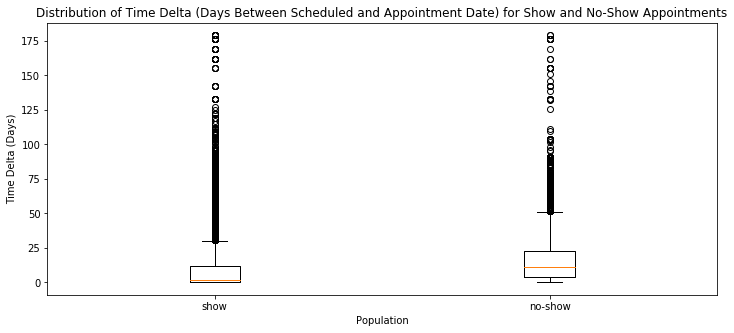

In [277]:
# https://matplotlib.org/examples/pylab_examples/subplots_demo.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

fig, ax = plt.subplots(figsize=(12,5))
ax.boxplot([pt_show['time_delta'], pt_noshow['time_delta']], labels=['show', 'no-show'])

plt.title('Distribution of Time Delta (Days Between Scheduled and Appointment Date) for Show and No-Show Appointments')
plt.xlabel('Population')
plt.ylabel('Time Delta (Days)');
plt.show()

The boxplot suggests that 'show' appointments have shorter time deltas compared to 'no-show' appointments.

Since there are so many values for both populations that lie above the 75%, cannot conclude that those values are outliers.

Plot a histogram to view any differences in no-show outcomes depending on the time delta of the appointments. Since the no-show count is 20% of the the entire dataset, normalise the values to view the proportions of appointments as part of the show/no-show population.

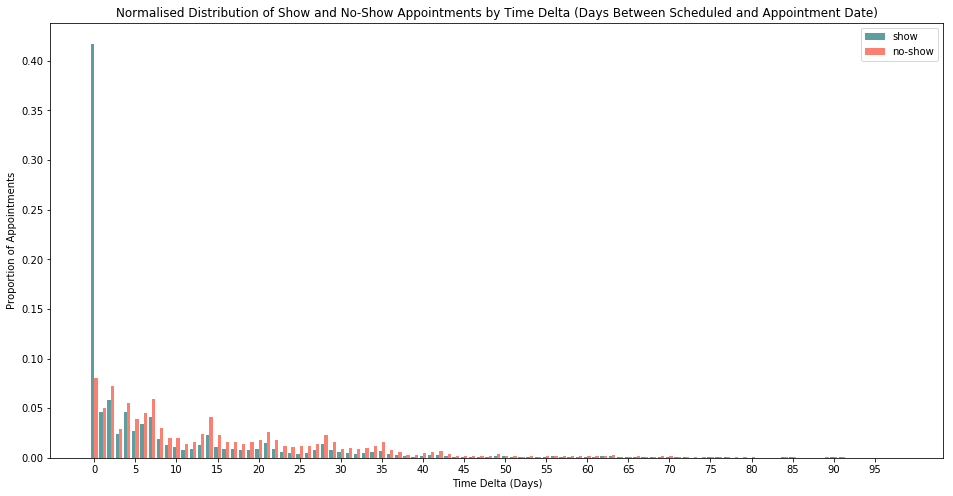

In [460]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
# https://matplotlib.org/mpl_examples/color/named_colors.hires.png
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

# time bins up to 100 (after which data counts are low and won't be visible)
age_bins = range(0, 100, 1)
plt.figure(figsize=(16,8))
plt.hist([pt_show['time_delta'], pt_noshow['time_delta']], color = ['cadetblue', 'salmon'], \
         bins=age_bins, label = ['show', 'no-show'], align='left', density=True);

plt.xticks(range(0, 100, 5))
plt.title('Normalised Distribution of Show and No-Show Appointments by Time Delta (Days Between Scheduled and Appointment Date)')
plt.xlabel('Time Delta (Days)')
plt.ylabel('Proportion of Appointments');
plt.legend();

Most show appointments appear to have a time delta of 0 days, which contributes to the lower time delta mean for that group.

### Exploration 2 : Age / Gender and No-Show Outcomes

Plot a histogram to view any overt differences in no-show outcomes depending on the age distribution for the patients. Again, normalise the proportions.

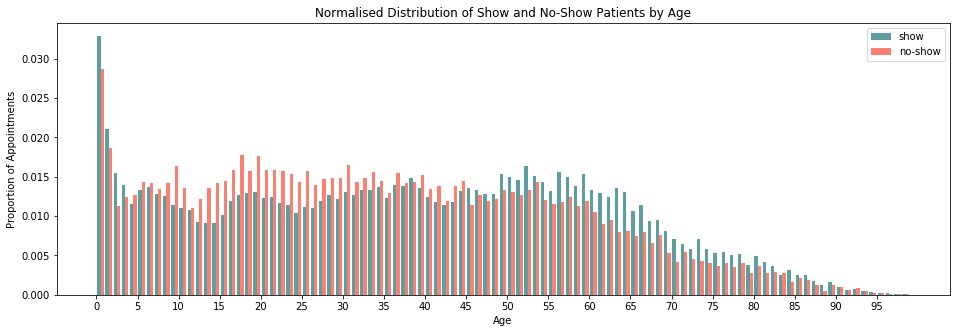

In [463]:
# age bins in increments of 5
age_bins = range(0, 100, 1)
plt.figure(figsize=(16,5))
plt.hist([pt_show['age'], pt_noshow['age']], color = ['cadetblue', 'salmon'], \
         bins=age_bins, label = ['show', 'no-show'], density=True);

plt.xticks(range(0, 100, 5))
plt.title('Normalised Distribution of Show and No-Show Patients by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Appointments');
plt.legend();

From a quick glance at the distribution, it appears that no-shows happens more often for patients in the younger age ranges (ages 5 - 45). This reverses before the age of 5, and once the age is past 45, when the proportion of show appointments grow larger than the proportion of no-shows.

Similarly, view the normalised distribution of show and no-show patients by gender

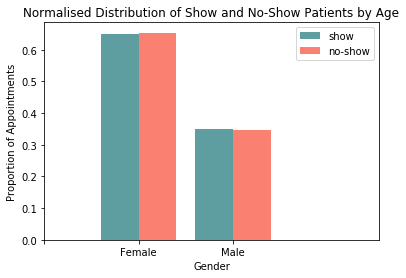

In [244]:
gender_bins = range(4)
plt.figure(figsize=(6,4))
plt.hist([pt_show['gender'], pt_noshow['gender']], color = ['cadetblue', 'salmon'], \
         bins = gender_bins, label = ['show', 'no-show'], density=True, align='right');

# set the xticks
plt.xticks(np.arange(0,3), ['', 'Female', 'Male'])
plt.title('Normalised Distribution of Show and No-Show Patients by Age')
plt.xlabel('Gender')
plt.ylabel('Proportion of Appointments');
plt.legend()

Beyond the larger proportion of female patients who make appointments, there doesn't seem to be much visual difference between show and no-show based on gender.

### Exploration 3 : Neighbourhood and No-Show Outcomes

Using a bar plot, view the counts of show and no-show appointments depending on the neighbourhood.


In [300]:
# get count of appointments by neighbourhood
show_neighbourhoods = pt_show['neighbourhood'].value_counts()
noshow_neighbourhoods = pt_noshow['neighbourhood'].value_counts()

In [313]:
# get list of all neighbourhoods
all_neighbourhoods = df['neighbourhood'].value_counts()
all_index = all_neighbourhoods.index

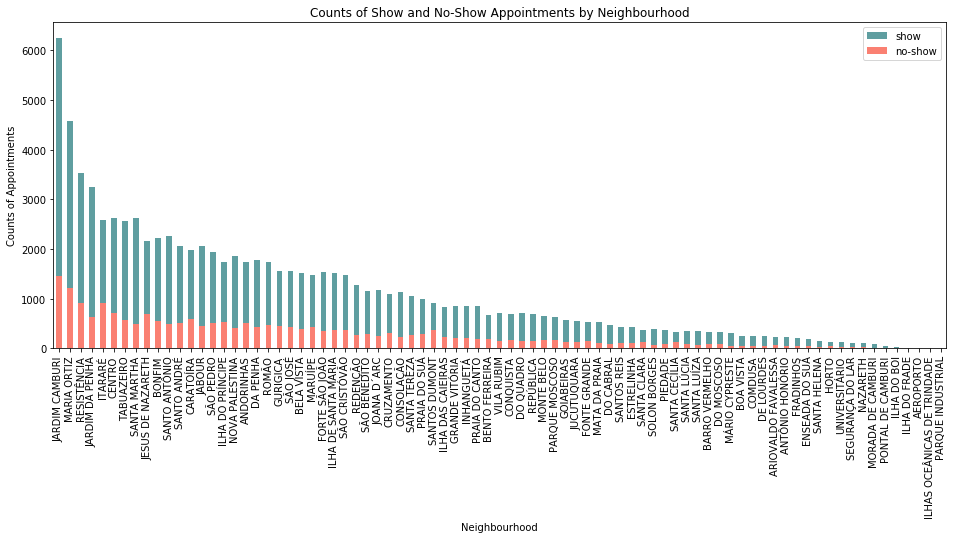

In [335]:
fig, ax = plt.subplots(figsize=(16,6))
show_neighbourhoods[all_index].plot(kind='bar', color='cadetblue', label='show');
noshow_neighbourhoods[all_index].plot(kind='bar', color='salmon', label='no-show');
plt.title('Counts of Show and No-Show Appointments by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts of Appointments');
plt.legend()

Unfortunately, there are many neighbourhoods and large counts, and so the proportion of no-show appointments is hard to view in this form. 

Alternatively, plot the proportions directly.

In [336]:
# calculate the proportion of no-shows by neighbourhood
percent_neighbourhoods = noshow_neighbourhoods[all_index] / all_neighbourhoods[all_index]
percent_neighbourhoods.sort_values(inplace=True) 

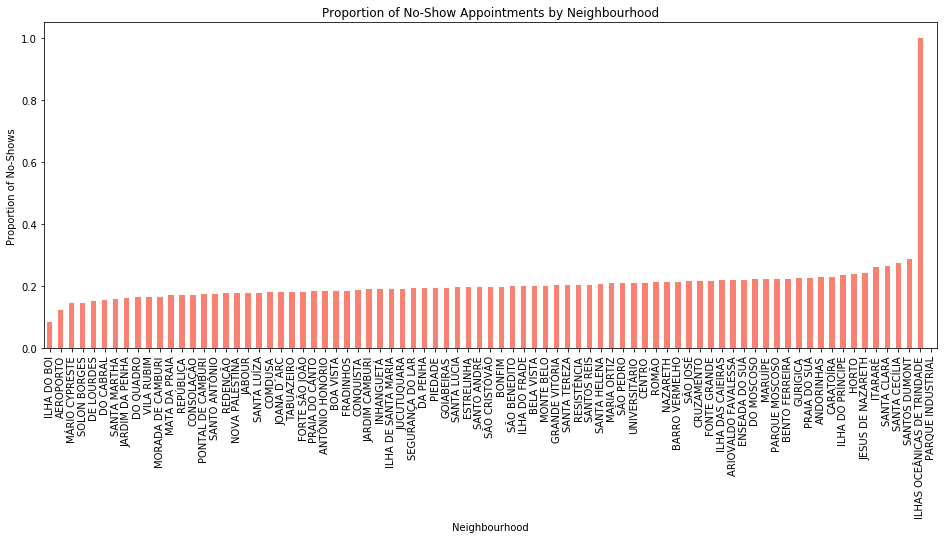

In [338]:
fig, ax = plt.subplots(figsize=(16,6))
percent_neighbourhoods.plot(kind='bar', color='salmon')
plt.title('Proportion of No-Show Appointments by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Proportion of No-Shows');

Investigate further several nieghbourhoods:
- the lowest proportion for Ilha do Boi
- 100% now show for Ilhas Oceânicas de Trindade
- 0% for Parque Industrial

In [340]:
percent_neighbourhoods.head()

ILHA DO BOI       0.085714
AEROPORTO         0.125000
MÁRIO CYPRESTE    0.145553
SOLON BORGES      0.147122
DE LOURDES        0.154098
Name: neighbourhood, dtype: float64

In [341]:
df[df['neighbourhood'] == 'ILHA DO BOI']

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_delta
1568,F,70,ILHA DO BOI,0,0,0,0,0,1,No,11
1575,F,57,ILHA DO BOI,0,0,0,0,0,1,Yes,14
2603,F,20,ILHA DO BOI,0,0,0,0,0,0,No,21
5324,M,73,ILHA DO BOI,0,0,0,0,0,0,No,2
5631,F,65,ILHA DO BOI,0,0,0,0,0,0,No,0
18199,M,33,ILHA DO BOI,0,0,0,0,0,0,No,0
27946,F,60,ILHA DO BOI,0,1,0,0,0,0,No,9
32876,F,31,ILHA DO BOI,0,0,0,0,0,0,No,0
32924,F,61,ILHA DO BOI,0,0,1,0,0,1,No,30
33635,M,73,ILHA DO BOI,0,0,0,0,0,0,No,2


In [343]:
print(len(df[df['neighbourhood'] == 'ILHA DO BOI']))

35


Looks like there were 35 appointment records for Ilha do Boi which means the proportion is unlikely to be skewed because of small sample size. Cursory search suggests that Ilha do Boi is a [rich neighbourhood](https://www.ultimosrefugios.org.br/location-vitoria-ilha-do-boi) which might be related to the low no-show rate.

Now check the 100% and 0% no-show rate neighbourhoods:

In [332]:
percent_neighbourhoods.tail()

SANTA CLARA                    0.264822
SANTA CECÍLIA                  0.274554
SANTOS DUMONT                  0.289185
ILHAS OCEÂNICAS DE TRINDADE    1.000000
PARQUE INDUSTRIAL                   NaN
Name: neighbourhood, dtype: float64

In [344]:
df[df['neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_delta
48754,F,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,29
48765,F,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,29


Having only 2 records, both of which were no-shows, means the 100% no-show rate is unlikely to be representative for the Ilhas Oceânicas de Trindade neighbourhood.

In [345]:
df[df['neighbourhood'] == 'PARQUE INDUSTRIAL']

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_delta
75199,F,17,PARQUE INDUSTRIAL,0,0,0,0,0,0,No,0


Similarly, only one record exists for neighbourhood Parque Industrial, which means the no-show rate from this dataset is unlikely to apply to the actual population in the neighbourhood.

If we had further data about the neighbourhoods (such as income, demographics) we might be able to further explore their relation to the no-show rate.

### Exploration 4: Scholarship (Welfare) / Hypertension / Diabetes / Alcoholism / Handicap / SMS Received and No-Show Outcomes

The remaining factors are all binary variables (except for handicap, which has 5 levels) and we can proportion of show vs no-shop appointments with a normalised histogram (since the show data counts outnumber the no-show counts).

In [432]:
# levels of handicap variable
df.groupby('handcap')['no_show'].value_counts()

handcap  no_show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: no_show, dtype: int64

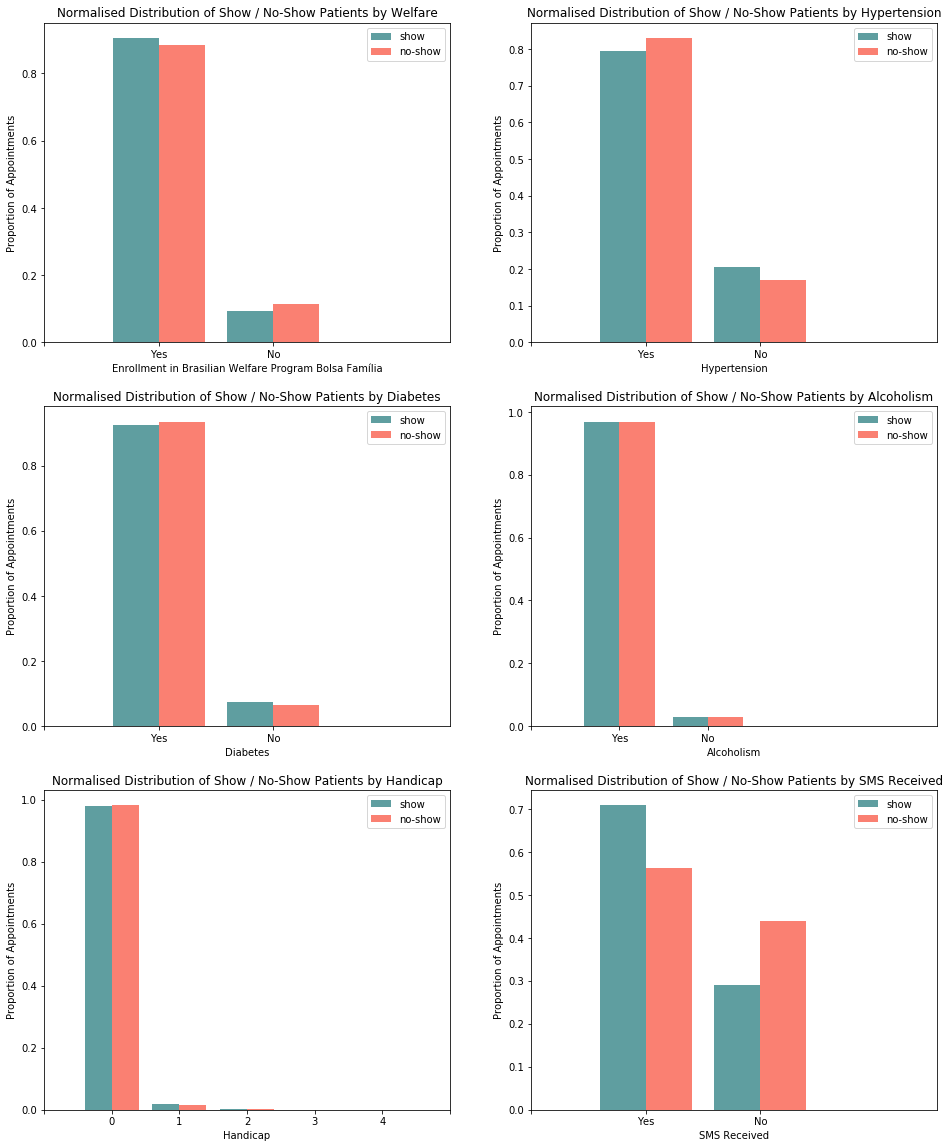

In [453]:
# https://stackoverflow.com/questions/24416612/setting-active-subplot-using-axes-object-in-matplotlib

# set up subplots
fig, axs = plt.subplots(3, 2, figsize=(16,20))

# scholarship/welfare
plt.sca(axs[0, 0])
scholar_bins = range(4)
plt.hist([pt_show['scholarship'], pt_noshow['scholarship']], color = ['cadetblue', 'salmon'], \
              bins = scholar_bins, label = ['show', 'no-show'], density=True, align='right');
plt.xticks(np.arange(0,3), ['', 'Yes', 'No'])
plt.title('Normalised Distribution of Show / No-Show Patients by Welfare')
plt.xlabel('Enrollment in Brasilian Welfare Program Bolsa Família')
plt.ylabel('Proportion of Appointments');
plt.legend();

# hypertension
plt.sca(axs[0, 1])
scholar_bins = range(4)
plt.hist([pt_show['hipertension'], pt_noshow['hipertension']], color = ['cadetblue', 'salmon'], \
              bins = scholar_bins, label = ['show', 'no-show'], density=True, align='right');
plt.xticks(np.arange(0,3), ['', 'Yes', 'No'])
plt.title('Normalised Distribution of Show / No-Show Patients by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Proportion of Appointments');
plt.legend();

# diabetes
plt.sca(axs[1, 0])
diabetes_bins = range(4)
plt.hist([pt_show['diabetes'], pt_noshow['diabetes']], color = ['cadetblue', 'salmon'], \
              bins = diabetes_bins, label = ['show', 'no-show'], density=True, align='right');
plt.xticks(np.arange(0,3), ['', 'Yes', 'No'])
plt.title('Normalised Distribution of Show / No-Show Patients by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Proportion of Appointments');
plt.legend();

# alcoholism
plt.sca(axs[1, 1])
alcoholism_bins = range(5)
plt.hist([pt_show['alcoholism'], pt_noshow['alcoholism']], color = ['cadetblue', 'salmon'], \
              bins = alcoholism_bins, label = ['show', 'no-show'], density=True, align='right');
plt.xticks(np.arange(0,3), ['', 'Yes', 'No'])
plt.title('Normalised Distribution of Show / No-Show Patients by Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Proportion of Appointments');
plt.legend();

# handicap
plt.sca(axs[2, 0])
handicap_bins = range(6)
plt.hist([pt_show['handcap'], pt_noshow['handcap']], color = ['cadetblue', 'salmon'], \
              bins=handicap_bins, label = ['show', 'no-show'], density=True, align='right');
plt.xticks(np.arange(0,7), ['', '0', '1', '2', '3', '4', ''])
plt.title('Normalised Distribution of Show / No-Show Patients by Handicap')
plt.xlabel('Handicap')
plt.ylabel('Proportion of Appointments');
plt.legend();

# sms received
plt.sca(axs[2, 1])
sms_bins = range(4)
plt.hist([pt_show['sms_received'], pt_noshow['sms_received']], color = ['cadetblue', 'salmon'], \
              bins = sms_bins, label = ['show', 'no-show'], density=True, align='right');
plt.xticks(np.arange(0,3), ['', 'Yes', 'No'])
plt.title('Normalised Distribution of Show / No-Show Patients by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Proportion of Appointments');
plt.legend();




There does not appear to be a pronounced relation of these variables to the show/no-show rate, except for the variable 'SMS received' (the lower right plot). SMS receipt seems to correlate with the patient showing up for the appointment. 

<a id='conclusions'></a>
## Conclusions

Through the use of descriptive statistics and data visualisations, __several factors appear to be related to the show/no-show rate__:

- time delta (show appointments have a lower time delta mean and most show appointments have time delta of 0)
- younger ages (5 - 45) are more likely to be no-shows compared with ages (0 - 5, very young) and (45+, older)
- neighbourhood - Ilha do Boi has a low no-show rate compared to other neighbourhoods
- SMS received possibly correlates with increased show rate

Of course, due to the limitation of descriptive statistics and visualisations, all these findings are exploratory and the above noted factors are just possible correlations, not any indication of causation. No inferences are being made by this report. 

<a id='references'></a>
## References

- https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value
- https://matplotlib.org/examples/pylab_examples/subplots_demo.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
- https://matplotlib.org/mpl_examples/color/named_colors.hires.png
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
- https://www.ultimosrefugios.org.br/location-vitoria-ilha-do-boi
- https://stackoverflow.com/questions/24416612/setting-active-subplot-using-axes-object-in-matplotlib